In [2]:
import numpy as np  # For vectorized math operations
from scipy.stats import gumbel_r
from matplotlib import pyplot as plt
import seaborn as sns

In [79]:
%config InlineBackend.figure_format='retina'
sns.set_theme(context='notebook', style='white', font="Latin Modern Roman", rc = {"axes.spines.right": False, "axes.spines.top": False})

In [80]:
N = 999
J = 4

In [81]:
np.random.seed(1234)
η = np.random.gumbel(0, 1, (N, J))
u = np.ones((N, 1)) @ np.random.normal(0, 5, (1, J))

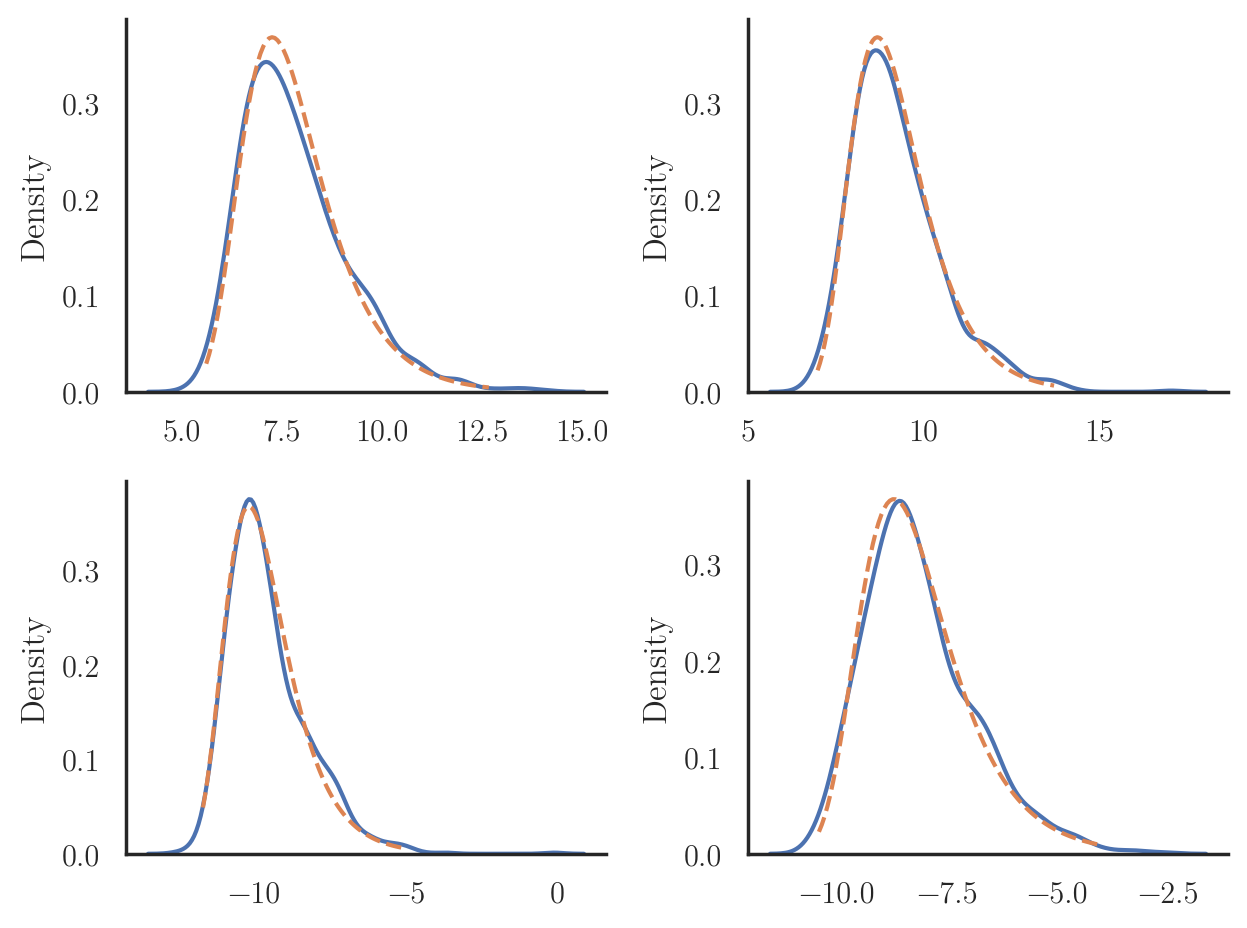

In [82]:
fig, axs = plt.subplots(2, 2)
for i in range(J):
    plt.sca(axs.reshape(-1)[i])
    sns.kdeplot((u + η)[:, i])
    sns.lineplot(
        **dict(
            zip(
                ["x", "y"],
                list(
                    zip(
                        *(
                            (x, gumbel_r.pdf(x, u[0, i]))
                            for x in np.linspace(
                                *np.percentile((u + η)[:, i], [0.5, 99.5]), 100
                            )
                        )
                    )
                ),
            )
        ),
        linestyle="dashed"
    )
    # plt.axvline(x = df["product_features"][i, :] @ df["latent_β_prod"][:, 0], color="black", drawstyle="steps-pre", linestyle="dashed", zorder=-1)
fig.tight_layout()
plt.show()

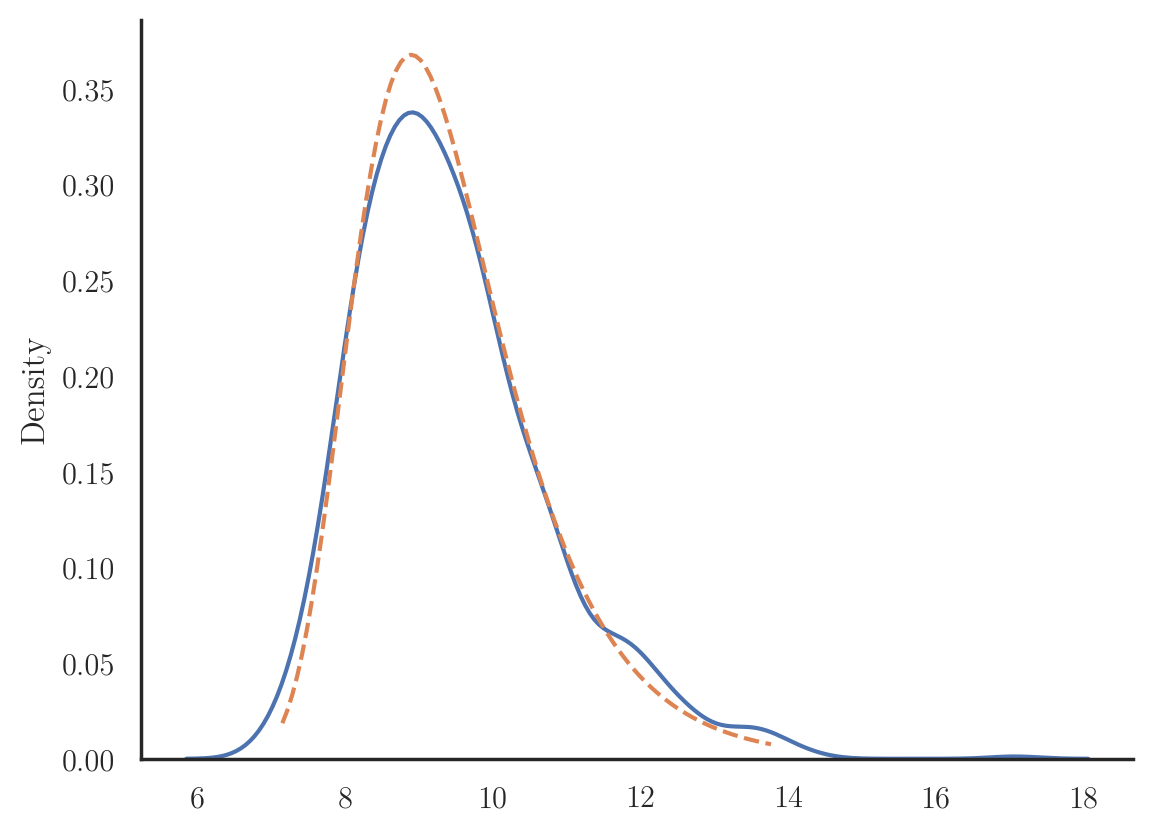

In [83]:
# you can see that small samples of the Gumbell always look a bit off
mu_bar = np.log(np.sum(np.exp(u[0, :])))
sns.kdeplot(np.max(u + η, axis=1))
sns.lineplot(
    **dict(
        zip(
            ["x", "y"],
            list(
                zip(
                    *(
                        (x, gumbel_r.pdf(x, mu_bar))
                        for x in np.linspace(
                            *np.percentile(np.max(u + η, axis=1), [0.5, 99.5]), 100
                        )
                    )
                )
            ),
        )
    ),
    linestyle="dashed"
)
plt.show()